In [251]:
# Importation des bibliothéques utiles pour l'analyse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [252]:
# Chargement de notre DataFrame 
data=pd.read_csv("C:/Users/User/Desktop/Projet_ML/Telco-Customer-Churn1.csv")
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [253]:
var_to_drop=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
             'Churn Label', 'CLTV','Churn Score', 'Churn Reason']

In [254]:
#suppression des variables unutiles
data=data.drop(columns=var_to_drop)

In [255]:
# Convertion en type numérique
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')


In [256]:
# on va supprimer les 11 valeur manquantes de la variable 'Total Charges
data=data.dropna()

In [257]:
data.shape

(7032, 20)

In [258]:
#liste des variables a encoder 
col_to_encoder=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']

In [259]:
data_encod=pd.get_dummies(data[col_to_encoder],drop_first=True)
data_num=data[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
data=pd.concat([data_encod,data_num],axis=1)
data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1
2,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
3,0,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
4,1,0,0,1,1,0,1,1,0,0,...,0,0,1,0,0,0,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,72,21.15,1419.40,0
7039,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,24,84.80,1990.50,0
7040,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,72,103.20,7362.90,0
7041,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,11,29.60,346.45,0


In [260]:
y=data['Churn Value']
y
x=data.drop(columns='Churn Value')
print(x.shape)
print(y.shape)

(7032, 30)
(7032,)


In [261]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = y)


In [262]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


x_train[['Tenure Months','Monthly Charges','Total Charges']]=scaler.fit_transform(x_train[['Tenure Months','Monthly Charges','Total Charges']])
x_test[['Tenure Months','Monthly Charges','Total Charges']]=scaler.transform(x_test[['Tenure Months','Monthly Charges','Total Charges']])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Selection Features with : `Correlation between features and target and and Correlation features betwen them` 

In [263]:
train_data=pd.concat([x_train,y_train],axis=1)
train_data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
2452,0,0,1,0,1,0,1,1,0,0,...,0,1,1,1,0,0,1.000000,0.919283,0.929879,0
399,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0.014085,0.241156,0.006194,1
5362,1,0,1,1,1,0,0,0,1,1,...,1,0,0,0,0,1,0.253521,0.014948,0.039163,0
5976,1,0,1,0,1,0,1,0,0,0,...,0,1,1,1,0,0,0.971831,0.562033,0.612112,0
2484,0,0,1,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0.845070,0.876432,0.778001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0.000000,0.522172,0.006009,1
289,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0.028169,0.376183,0.017259,1
4785,0,0,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0.943662,0.011958,0.164422,0
6389,1,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0.028169,0.017937,0.003675,0


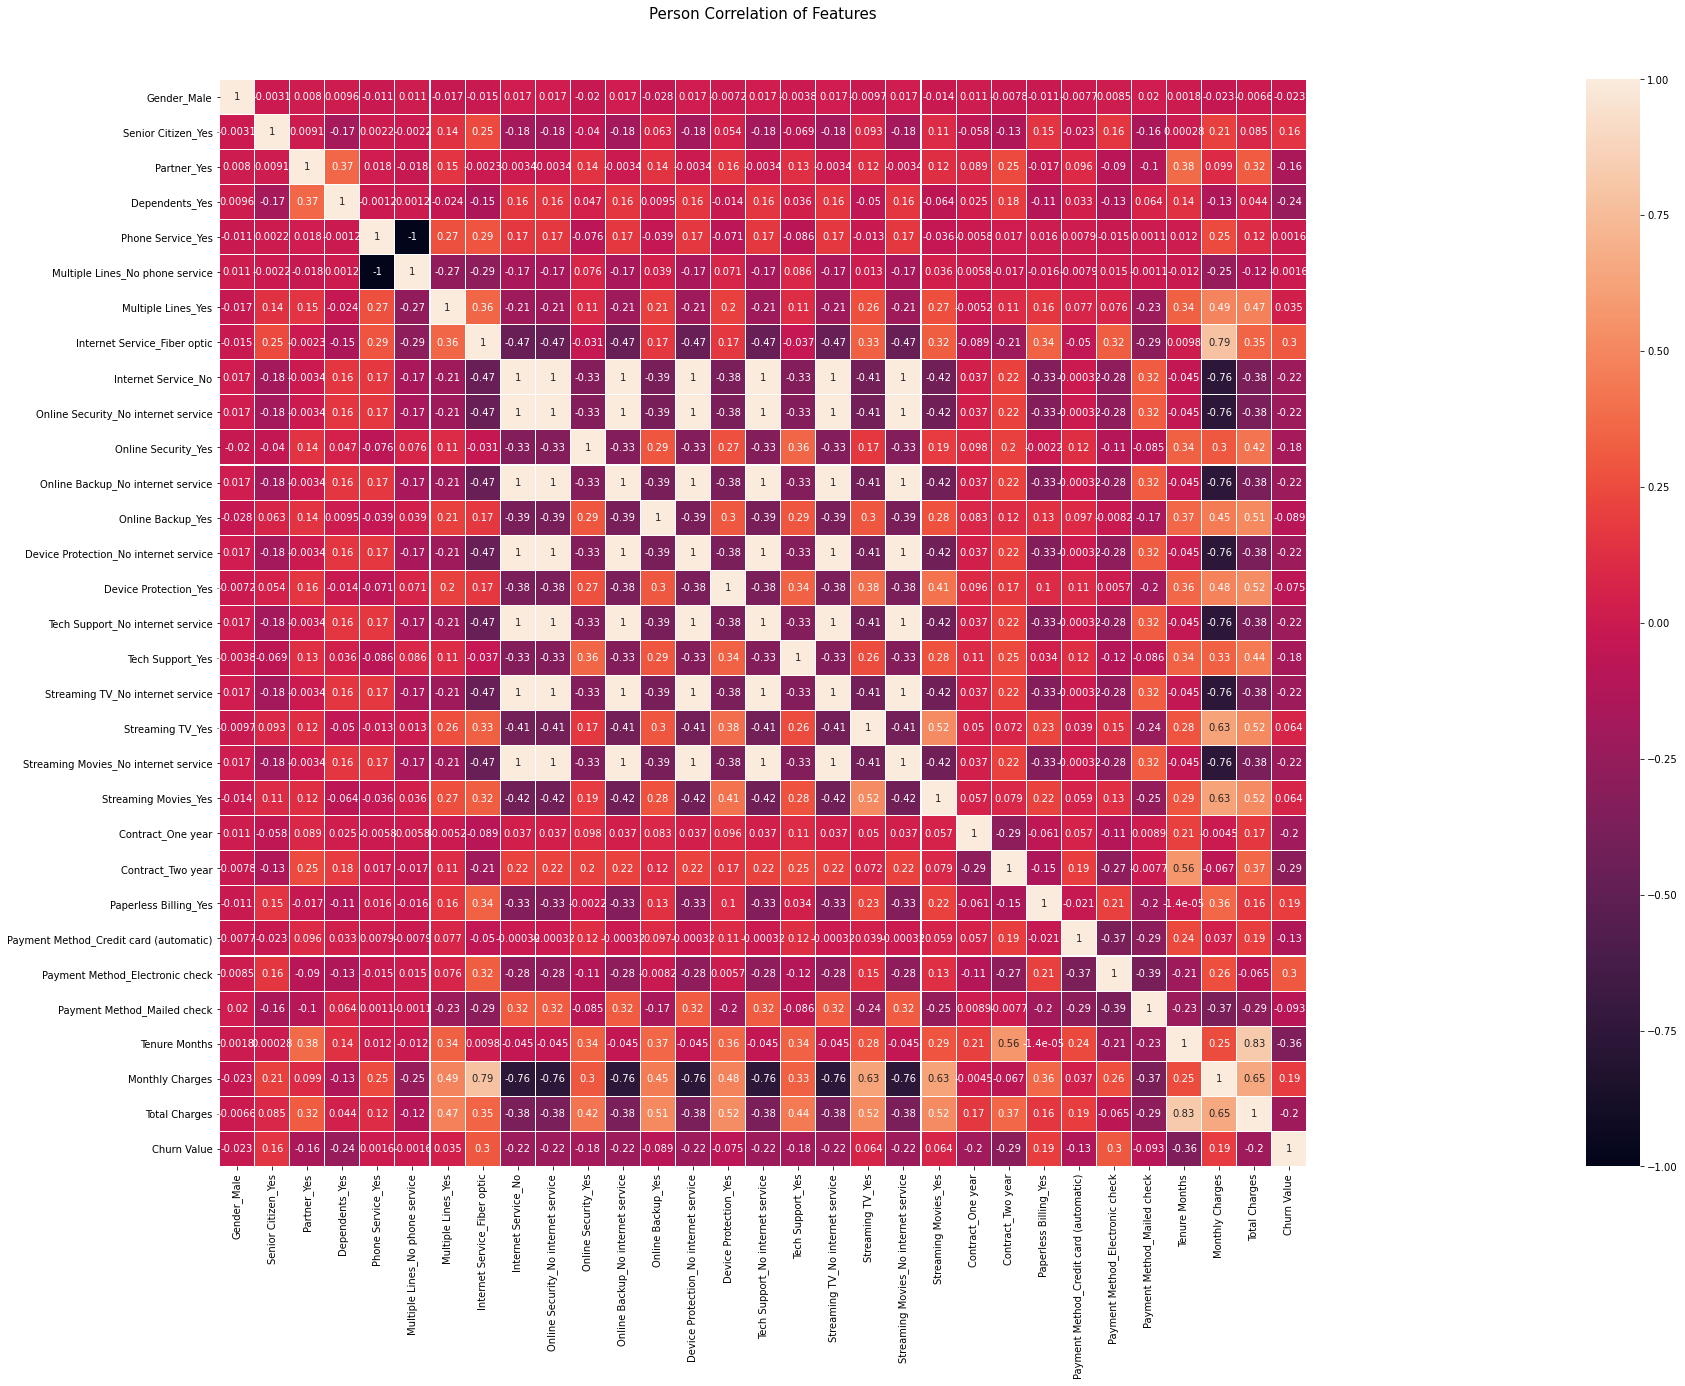

In [264]:
#colormap = plt.cm.RdBu
plt.figure(figsize=(100,20))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [265]:
mat=train_data.corr()
l=mat.tail(1)
l

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
Churn Value,-0.023287,0.156134,-0.157433,-0.239639,0.001639,-0.001639,0.034909,0.30222,-0.223004,-0.223004,...,-0.19718,-0.291762,0.190107,-0.128065,0.300043,-0.093232,-0.35527,0.185809,-0.20355,1.0


In [266]:
listdict=l.to_dict('records')
listdict

[{'Gender_Male': -0.02328749766572933,
  'Senior Citizen_Yes': 0.1561339348186886,
  'Partner_Yes': -0.15743299486025172,
  'Dependents_Yes': -0.23963881459481584,
  'Phone Service_Yes': 0.0016389389751222492,
  'Multiple Lines_No phone service': -0.001638938975122176,
  'Multiple Lines_Yes': 0.03490893876219037,
  'Internet Service_Fiber optic': 0.3022199579649717,
  'Internet Service_No': -0.22300384631292958,
  'Online Security_No internet service': -0.22300384631292958,
  'Online Security_Yes': -0.1753978273989919,
  'Online Backup_No internet service': -0.22300384631292958,
  'Online Backup_Yes': -0.08888112194300768,
  'Device Protection_No internet service': -0.22300384631292958,
  'Device Protection_Yes': -0.07497712271637096,
  'Tech Support_No internet service': -0.22300384631292958,
  'Tech Support_Yes': -0.1763064792264795,
  'Streaming TV_No internet service': -0.22300384631292958,
  'Streaming TV_Yes': 0.06431810841739417,
  'Streaming Movies_No internet service': -0.2230

In [267]:
var_final=[]

for l in listdict:
    for k,v in l.items():
        if abs(v) >= 0.2:
            var_final.append(k)
        
del var_final[-1]

var_final

['Dependents_Yes',
 'Internet Service_Fiber optic',
 'Internet Service_No',
 'Online Security_No internet service',
 'Online Backup_No internet service',
 'Device Protection_No internet service',
 'Tech Support_No internet service',
 'Streaming TV_No internet service',
 'Streaming Movies_No internet service',
 'Contract_Two year',
 'Payment Method_Electronic check',
 'Tenure Months',
 'Total Charges']

In [268]:
x_train=x_train[var_final]
print(x_train.shape)
x_train
x_test=x_test[var_final]
x_test.shape

(4922, 13)


(2110, 13)

In [269]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [270]:
cf = correlatedFeatures(x_train, 0.85)
cf

{'Device Protection_No internet service',
 'Online Backup_No internet service',
 'Online Security_No internet service',
 'Streaming Movies_No internet service',
 'Streaming TV_No internet service',
 'Tech Support_No internet service'}

In [271]:
x_train = x_train.drop(cf, axis=1)
x_test = x_test.drop(cf, axis=1)
print(x_train.shape)
print(x_test.shape)

(4922, 7)
(2110, 7)


## Application du modele KNeighborsClassifier

In [272]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors' : np.arange(1,51),
           'metric': ['euclidean' ,'manhattan','minkowski'],
           'weights' :[ 'uniform','distance']} #dictionaire qui contient les paramtres qu'on veut regler
KNeighborsClassifier()
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']})

In [273]:
knn_grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}

In [356]:

knn_model=KNeighborsClassifier(n_neighbors=49,metric='manhattan')

knn_model.fit(x_train,y_train)

print('score du train ' ,knn_model.score(x_train,y_train))
print('score du test' ,knn_model.score(x_test,y_test))

score du train  0.8051605038602194
score du test 0.8004739336492891


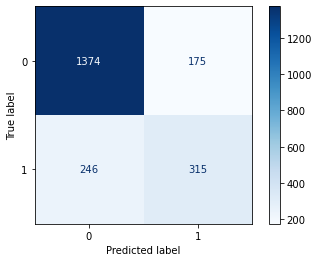

In [357]:
from sklearn.metrics import plot_confusion_matrix

y_pred=knn_model.predict(x_test)
plot_confusion_matrix(knn_model,x_test,y_test,cmap=plt.cm.Blues);

In [358]:
from sklearn.metrics import classification_report

y_pred=knn_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.848148  0.887024  0.867151      1549
           1   0.642857  0.561497  0.599429       561

    accuracy                       0.800474      2110
   macro avg   0.745503  0.724261  0.733290      2110
weighted avg   0.793566  0.800474  0.795970      2110



In [359]:
from sklearn.metrics import roc_curve
y_scores = knn_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

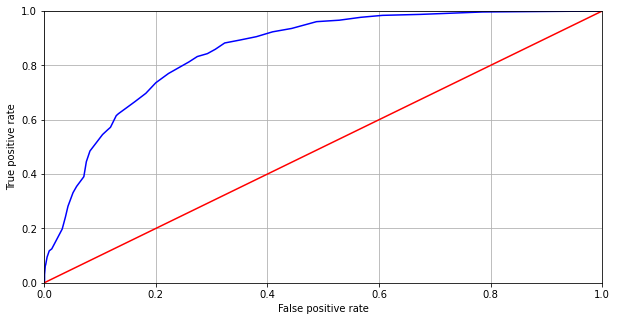

In [360]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [361]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8527794943319191

## Application du modele DecisionTreeClassifier

In [280]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10)
      } 

tree_grid= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [281]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [333]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)
tree_model.fit(x_train,y_train)
print('train score : ', tree_model.score(x_train,y_train))
print('test score : ', tree_model.score(x_test,y_test))

train score :  0.8082080455099553
test score :  0.79478672985782


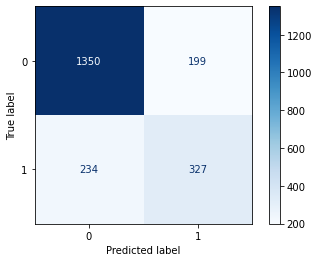

In [334]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Blues);

In [335]:
from sklearn.metrics import classification_report

y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.852273  0.871530  0.861794      1549
           1   0.621673  0.582888  0.601656       561

    accuracy                       0.794787      2110
   macro avg   0.736973  0.727209  0.731725      2110
weighted avg   0.790962  0.794787  0.792629      2110



In [336]:
from sklearn.metrics import roc_curve
y_scores = tree_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

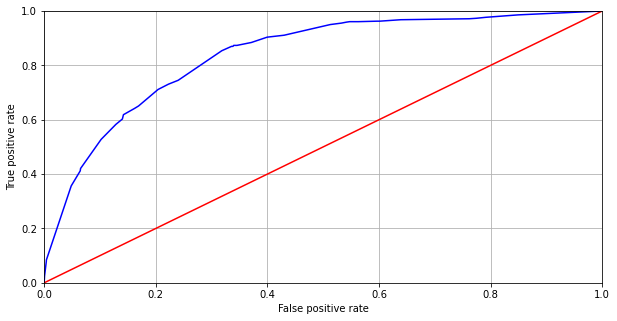

In [337]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [338]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8381970312627662

In [339]:
names=['Dependents_Yes', 'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months',
       'Total Charges']

In [340]:
x_train.columns

Index(['Dependents_Yes', 'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_Two year', 'Payment Method_Electronic check', 'Tenure Months',
       'Total Charges'],
      dtype='object')

In [341]:
for var, importance in zip(names, tree_model.feature_importances_):
    if importance != 0:
        print(var, importance)

Dependents_Yes 0.08862340932120441
Internet Service_Fiber optic 0.29994051483010437
Internet Service_No 0.04583509990312258
Contract_Two year 0.012175782090136662
Payment Method_Electronic check 0.03121204561110839
Tenure Months 0.4297128130003588
Total Charges 0.09250033524396477


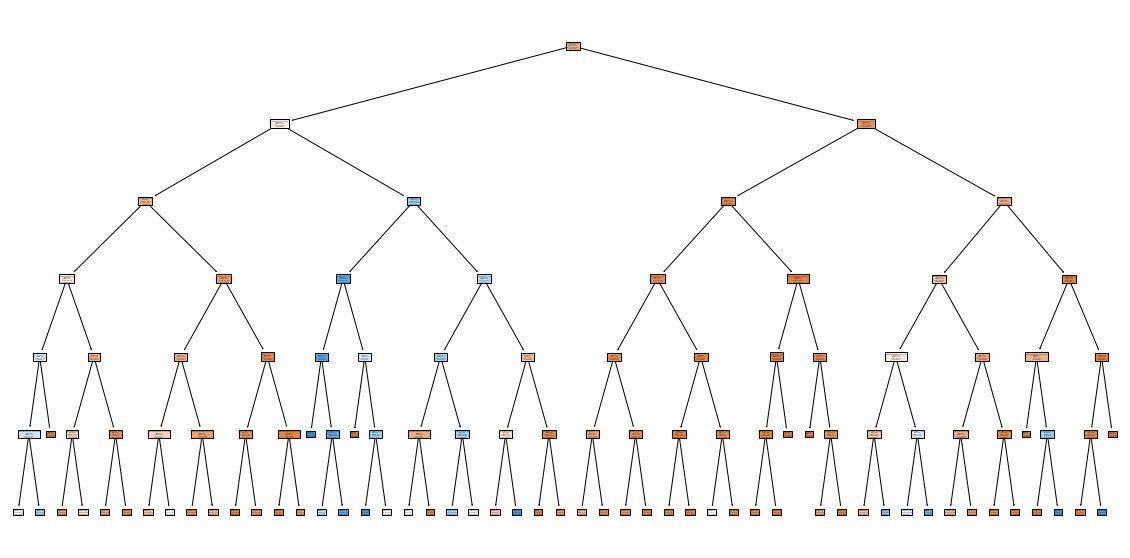

In [342]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
c=['quitter', 'rester']
plot_tree(tree_model, feature_names= names, class_names=c, filled=True)
plt.show()

In [343]:
from sklearn.tree import export_text

print(export_text(tree_model,feature_names=names))

|--- Tenure Months <= 0.22
|   |--- Internet Service_Fiber optic <= 0.50
|   |   |--- Tenure Months <= 0.04
|   |   |   |--- Internet Service_No <= 0.50
|   |   |   |   |--- Total Charges <= 0.02
|   |   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Total Charges >  0.02
|   |   |   |   |   |--- class: 0
|   |   |   |--- Internet Service_No >  0.50
|   |   |   |   |--- Total Charges <= 0.00
|   |   |   |   |   |--- Total Charges <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Total Charges >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Total Charges >  0.00
|   |   |   |   |   |--- Total Charges <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Total Charges >  0.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- Tenure Months >  0.04
|   |   |   |--

## Application du modele NaiveBayes

In [344]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():   #nb.items; parcourir cle et valeur
    s = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.711895299409847,
 'bernoulli': 0.7830089554702654,
 'multinomial': 0.7775240394535924}

In [345]:
bayes_model = BernoulliNB()
bayes_model.fit(x_train, y_train)
print('train score : ' ,bayes_model.score(x_train,y_train))
print('test score : ' , bayes_model.score(x_test,y_test))

train score :  0.7830150345388054
test score :  0.781042654028436


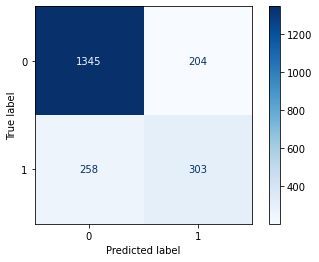

In [346]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(bayes_model,x_test,y_test,cmap=plt.cm.Blues);

In [347]:
from sklearn.metrics import classification_report

y_predi=bayes_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.83905   0.86830   0.85343      1549
           1    0.59763   0.54011   0.56742       561

    accuracy                        0.78104      2110
   macro avg    0.71834   0.70420   0.71042      2110
weighted avg    0.77486   0.78104   0.77738      2110



In [348]:
from sklearn.metrics import roc_curve
y_scores = bayes_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

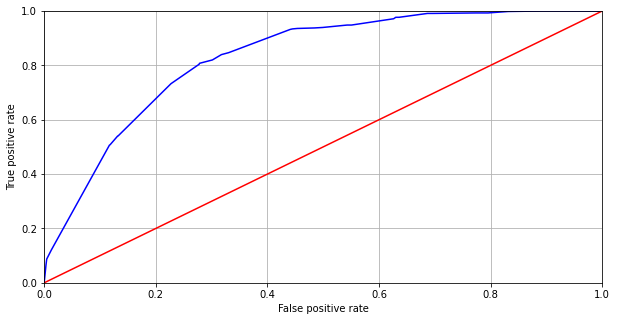

In [349]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [350]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8301439949182325

## Aplication du modele LogisticRegression

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid={'C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2....
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
                         'max_iter': [100, 1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs',

In [301]:
grid.best_params_

{'C': 0.10101010101010101, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [302]:
logre_model = LogisticRegression(random_state=0, C=0.10101, penalty = 'l1', solver='saga')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.8015034538805363
test score :  0.8052132701421801


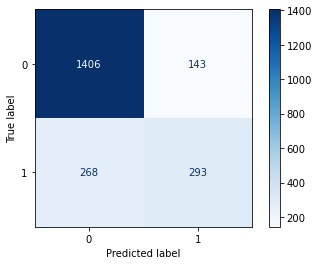

In [303]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [362]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.83990   0.90768   0.87248      1549
           1    0.67202   0.52228   0.58776       561

    accuracy                        0.80521      2110
   macro avg    0.75596   0.71498   0.73012      2110
weighted avg    0.79527   0.80521   0.79678      2110



In [363]:
from sklearn.metrics import roc_curve
y_scores = logre_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

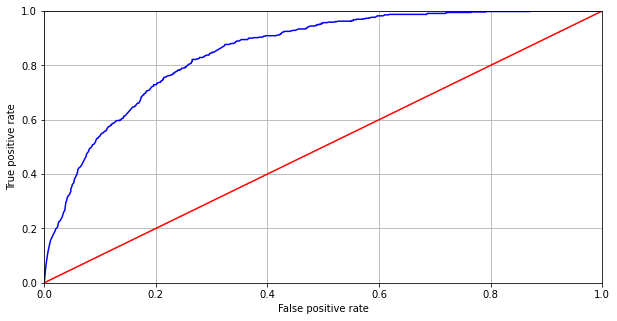

In [364]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [365]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8524975575064817

## Aplication du modele RandomForestClassifier

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10),
      } 

random_grid= GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
random_grid.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [309]:
random_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [326]:
random_model=RandomForestClassifier(criterion='gini', max_depth=9,random_state=77)
random_model.fit(x_train,y_train)

print('train score : ' ,random_model.score(x_train,y_train))
print('test score : ' ,random_model.score(x_test,y_test))


train score :  0.8386834620073141
test score :  0.8014218009478673


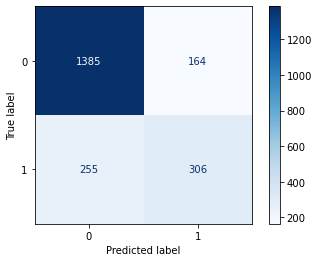

In [327]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,x_test,y_test,cmap=plt.cm.Blues);

In [366]:
y_predi=random_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.84451   0.89413   0.86861      1549
           1    0.65106   0.54545   0.59360       561

    accuracy                        0.80142      2110
   macro avg    0.74779   0.71979   0.73110      2110
weighted avg    0.79308   0.80142   0.79549      2110



In [367]:
from sklearn.metrics import roc_curve
y_scores = random_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

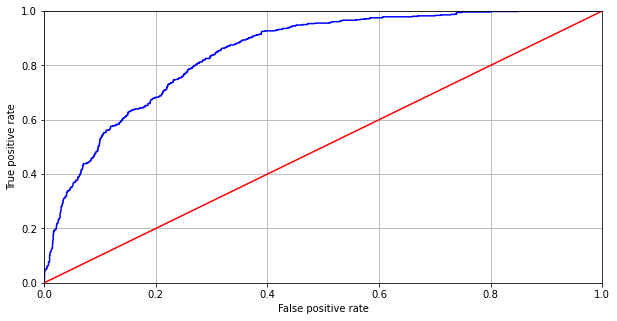

In [368]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [369]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.846655711407164

## Summary table 
## Selection Feature : `Correlation between features and target and and Correlation features betwen them` (with 7 features)

In [371]:
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

l=['KNeighborsClassifier','DecisionTreeClassifier','NaiveBayes(MultiNomial)','LogisticRegression','RandomForestClassifier']
train_score = pd.Series([0.8051,0.8082,0.7830,0.8015,0.8386], index=l)
test_score = pd.Series([0.8004,0.7947,0.7810,0.8052,0.8014], index=l)
f1_score_rester = pd.Series([0.8671,0.8617,0.8534,0.8724,0.8686], index=l)

f1_score_quitter = pd.Series([0.5964,0.6016,0.5674,0.5877,0.5963], index=l)
accuary = pd.Series([0.8004,0.7947,0.7810,0.8052,0.8014], index=l)
auc = pd.Series([0.8527,0.8381,0.8301,0.8524,0.8466], index=l)



In [372]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_rester': f1_score_rester,
                    'f1_score_quitter': f1_score_quitter ,
                   'accuary': accuary,
                   'AUC': auc})
stat


,train_score,test_score,f1_score_rester,f1_score_quitter,accuary,AUC
KNeighborsClassifier,0.8051,0.8004,0.8671,0.5964,0.8004,0.8527
DecisionTreeClassifier,0.8082,0.7947,0.8617,0.6016,0.7947,0.8381
NaiveBayes(MultiNomial),0.7830,0.7810,0.8534,0.5674,0.7810,0.8301
LogisticRegression,0.8015,0.8052,0.8724,0.5877,0.8052,0.8524
RandomForestClassifier,0.8386,0.8014,0.8686,0.5963,0.8014,0.8466


## Selection Feature : `Correlation between features and target and and Correlation features betwen them` (with 7 features)